<a href="https://colab.research.google.com/github/Zedbog/Data_science_course/blob/main/01_Projekt_praktyczny_regresja_bicycle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About data**

https://www.kaggle.com/alvations/regression-challenge-day-1-python

Context
The New York City Department of Transportation collects daily data about the number of bicycles going over bridges in New York City. This data is used to measure bike utilization as a part of transportation planning. This dataset is a daily record of the number of bicycles crossing into or out of Manhattan via one of the East River bridges (that is, excluding Bronx thruways and the non-bikeable Hudson River tunnels) for a stretch of 9 months.

Content
A count of the number of bicycles on each of the bridges in question is provided on a day-by-day basis, along with information on maximum and minimum temperature and precipitation.
Acknowledgements
This data is published in an Excel format by the City of New York. It has been processed into a CSV file for use on Kaggle.
Inspiration
In this dataset, how many bicycles cross into and out of Manhattan per day?
How strongly do weather conditions affect bike volumes?
What is the top bridge in terms of bike load?

#Przygotowanie środowiska i wczytanie danych źródłowych

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import data and concatenate all files in one dataframe
all_files = ['/content/drive/MyDrive/01_Projekt_praktyczny_regresja/04 April 2016 Cyclist Numbers for Web.xlsx',
             '/content/drive/MyDrive/01_Projekt_praktyczny_regresja/05 May 2016 Cyclist Numbers for Web.xlsx',
             '/content/drive/MyDrive/01_Projekt_praktyczny_regresja/06 June 2016 Cyclist Numbers for Web.xlsx',
             '/content/drive/MyDrive/01_Projekt_praktyczny_regresja/07 July 2016 Cyclist Numbers for Web.xlsx',
             '/content/drive/MyDrive/01_Projekt_praktyczny_regresja/08 August 2016 Cyclist Numbers for Web.xlsx',
             '/content/drive/MyDrive/01_Projekt_praktyczny_regresja/09 September 2016 Cyclist Numbers for Web.xlsx',
             '/content/drive/MyDrive/01_Projekt_praktyczny_regresja/10 October 2016 Cyclist Numbers for Web.xlsx']

In [ ]:
import pandas as pd
import numpy as np
# from google.colab import files
# uploaded = files.upload()

In [ ]:
# Import data and concatenate all files in one dataframe
# all_files = ['04 April 2016 Cyclist Numbers for Web.xlsx',
#              '05 May 2016 Cyclist Numbers for Web.xlsx',
#              '06 June 2016 Cyclist Numbers for Web.xlsx',
#              '07 July 2016 Cyclist Numbers for Web.xlsx',
#              '08 August 2016 Cyclist Numbers for Web.xlsx',
#              '09 September 2016 Cyclist Numbers for Web.xlsx',
#              '10 October 2016 Cyclist Numbers for Web.xlsx']
li = []

for filename in all_files:
  data = pd.read_excel(filename, skiprows=[0, 1, 2, 3, 4], skipfooter=8, usecols="B:K")
  li.append(data)

data = pd.concat(li, axis=0, ignore_index=True)

In [ ]:
# Check the data 
data[58:64]

,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
58,2016-05-29,2016-05-29,86.0,73.0,T,3193.0,4154,4918,3635,15900.0
59,2016-05-30,2016-05-30,79.0,68.0,1.65,1719.0,2750,3759,2689,10917.0
60,2016-05-31,2016-05-31,84.9,72.0,0,3948.0,7016,7957,5556,24477.0
61,2016-06-01,2016-06-01,82.0,71.1,0,4126.0,7565,9028,5823,26542.0
62,2016-06-02,2016-06-02,75.9,63.0,0,4161.0,7229,8764,5833,25987.0
63,2016-06-03,2016-06-03,70.0,64.0,0.04,1864.0,3708,4961,3189,13722.0


In [ ]:
# Change date into day of week
data.Day = data.Date.dt.day_name()

In [ ]:
data.head(5)

,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,2016-04-01,Friday,78.1,66.0,0.01,1704.0,3126,4115,2552,11497.0
1,2016-04-02,Saturday,55.0,48.9,0.15,827.0,1646,2565,1884,6922.0
2,2016-04-03,Sunday,39.9,34.0,0.09,526.0,1232,1695,1306,4759.0
3,2016-04-04,Monday,44.1,33.1,0.47 (S),521.0,1067,1440,1307,4335.0
4,2016-04-05,Tuesday,42.1,26.1,0,1416.0,2617,3081,2357,9471.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 214 non-null    datetime64[ns]
 1   Day                  214 non-null    object        
 2   High Temp (°F)       214 non-null    float64       
 3   Low Temp (°F)        214 non-null    float64       
 4   Precipitation        214 non-null    object        
 5   Brooklyn Bridge      214 non-null    float64       
 6   Manhattan Bridge     214 non-null    int64         
 7   Williamsburg Bridge  214 non-null    int64         
 8   Queensboro Bridge    214 non-null    int64         
 9   Total                214 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 16.8+ KB


In [ ]:
# cleaning the data from '(S)' and 'T' in Precipitation column
data.Precipitation = data.Precipitation.astype(str)
for el in range(len(data.Precipitation)):
  if data.Precipitation[el] == 'T':
    data.Precipitation[el] = '0.01'
  if data.Precipitation[el][-4:] == ' (S)':
    data.Precipitation[el] = (data.Precipitation[el]).replace(' (S)', '')
data.Precipitation = data.Precipitation.astype(float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
data.head(5)

,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,2016-04-01,Friday,78.1,66.0,0.01,1704.0,3126,4115,2552,11497.0
1,2016-04-02,Saturday,55.0,48.9,0.15,827.0,1646,2565,1884,6922.0
2,2016-04-03,Sunday,39.9,34.0,0.09,526.0,1232,1695,1306,4759.0
3,2016-04-04,Monday,44.1,33.1,0.47,521.0,1067,1440,1307,4335.0
4,2016-04-05,Tuesday,42.1,26.1,0.00,1416.0,2617,3081,2357,9471.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 214 non-null    datetime64[ns]
 1   Day                  214 non-null    object        
 2   High Temp (°F)       214 non-null    float64       
 3   Low Temp (°F)        214 non-null    float64       
 4   Precipitation        214 non-null    float64       
 5   Brooklyn Bridge      214 non-null    float64       
 6   Manhattan Bridge     214 non-null    int64         
 7   Williamsburg Bridge  214 non-null    int64         
 8   Queensboro Bridge    214 non-null    int64         
 9   Total                214 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(3), object(1)
memory usage: 16.8+ KB


Data visualisation

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

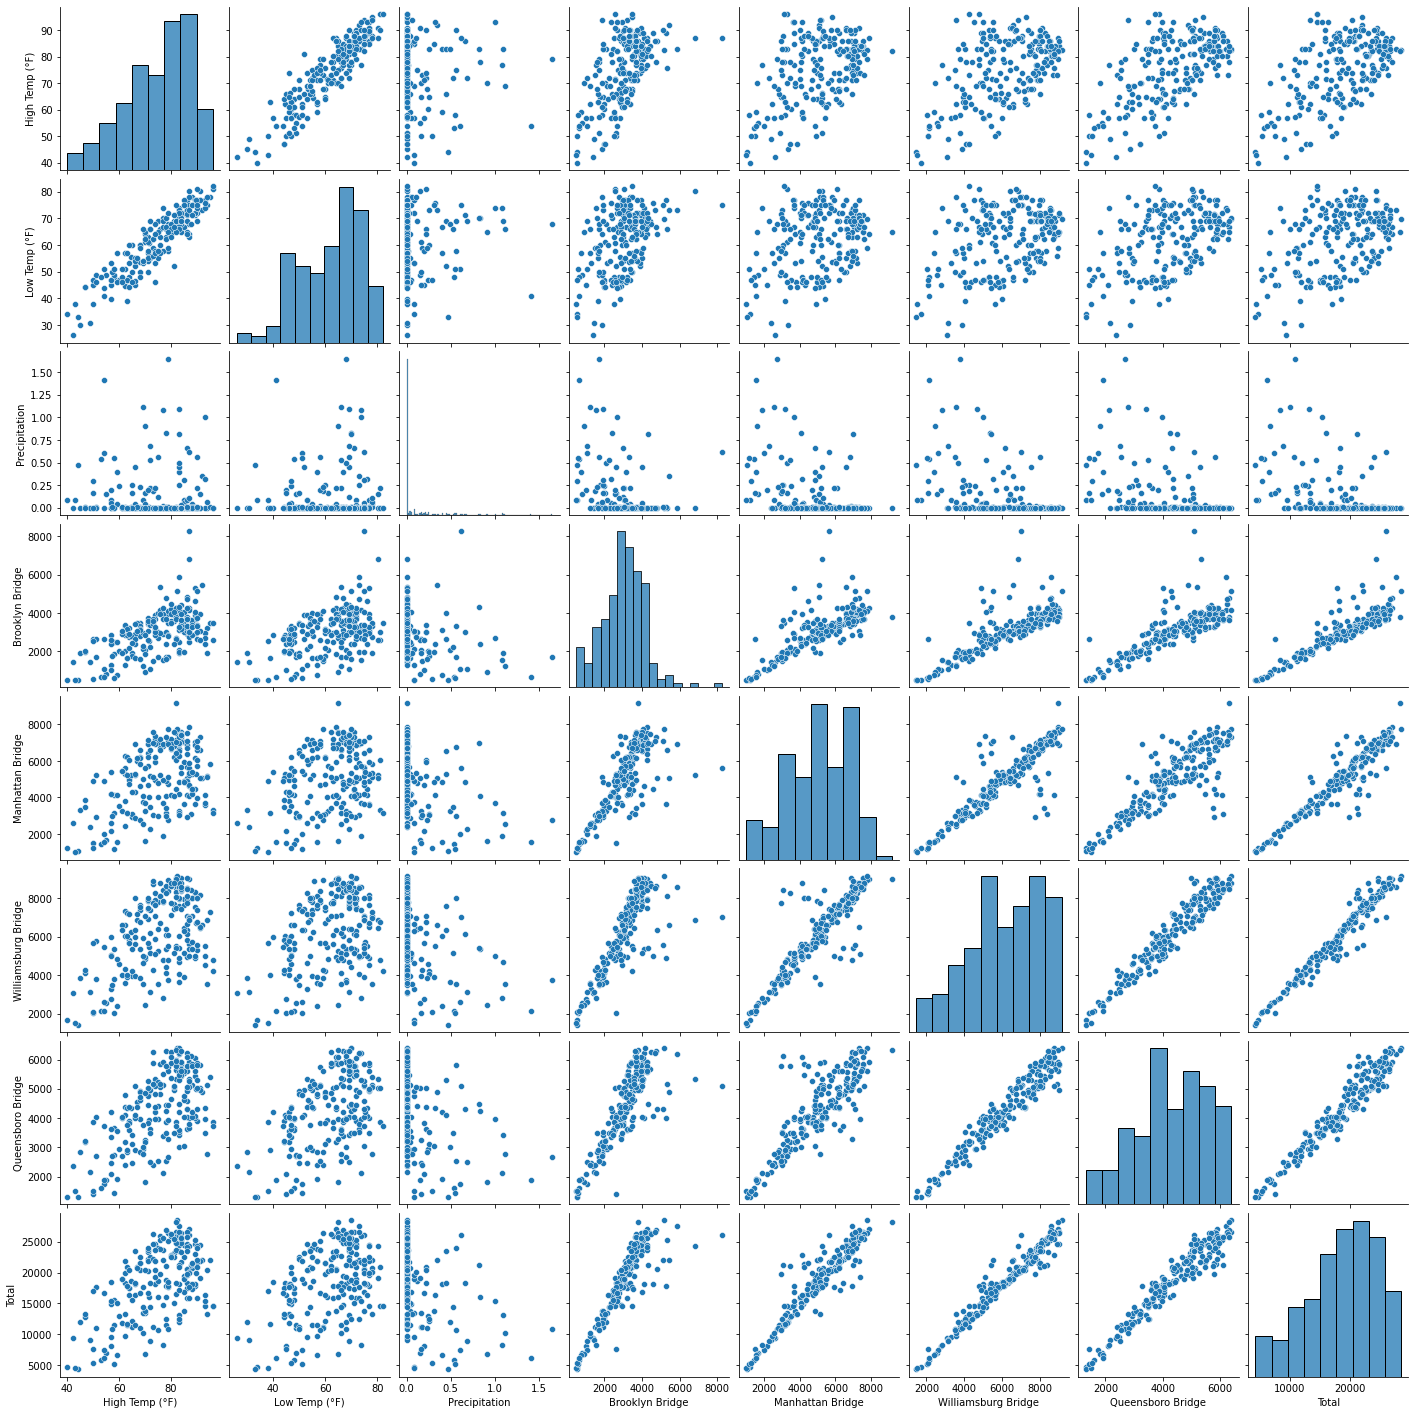

In [ ]:
sns.pairplot(data=data)

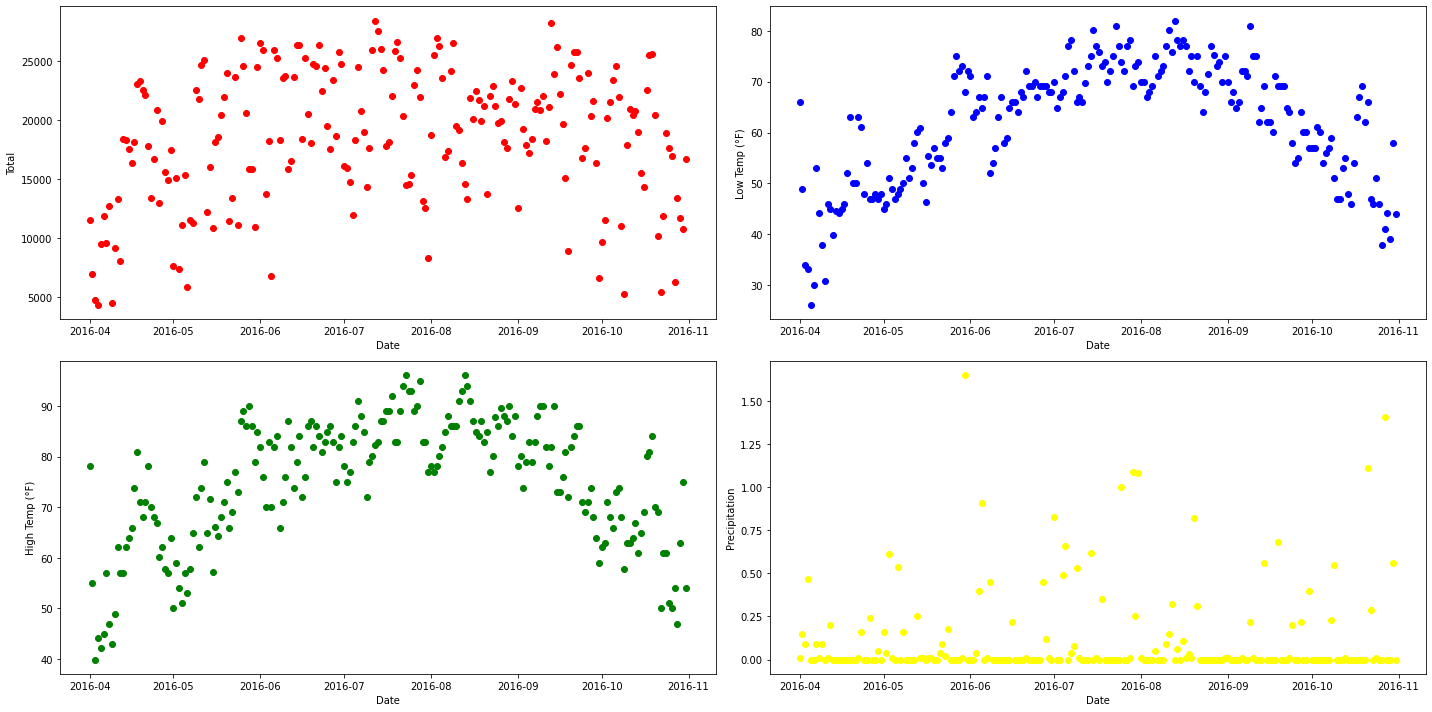

In [ ]:
def plot_points(ax, dataframe, x_label, y_label, color):
    ax.scatter(x=dataframe[x_label], y=dataframe[y_label], c=color)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)


fig, axs = plt.subplots(2, 2, figsize=(20, 10))
plot_points(axs[0, 0], data, "Date", 'Total', "red")
plot_points(axs[0, 1], data, "Date", "Low Temp (°F)", "blue")
plot_points(axs[1, 0], data, "Date", "High Temp (°F)", "green")
plot_points(axs[1, 1], data, "Date", "Precipitation", "yellow")
fig.tight_layout()

In [ ]:
import datetime

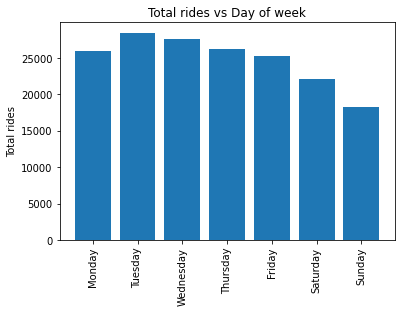

In [ ]:
fig, ax = plt.subplots()
ax.bar(data.Date.dt.dayofweek, data.Total)
ax.xaxis.set_tick_params(rotation=90)
ax.set_title('Total rides vs Day of week')
ax.set_xticklabels(['', 'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
ax.set_ylabel("Total rides")
plt.show()

Matrix correlation

In [ ]:
# Corelation matrix
data.corr()

,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
High Temp (°F),1.000000,0.917376,-0.051407,0.587071,0.468339,0.528813,0.618883,0.574180
Low Temp (°F),0.917376,1.000000,0.041582,0.475647,0.334844,0.397539,0.505758,0.442151
Precipitation,-0.051407,0.041582,1.000000,-0.338634,-0.411079,-0.423692,-0.388473,-0.421065
Brooklyn Bridge,0.587071,0.475647,-0.338634,1.000000,0.751702,0.792596,0.813200,0.874407
Manhattan Bridge,0.468339,0.334844,-0.411079,0.751702,1.000000,0.878377,0.838967,0.935473
Williamsburg Bridge,0.528813,0.397539,-0.423692,0.792596,0.878377,1.000000,0.965399,0.975089
Queensboro Bridge,0.618883,0.505758,-0.388473,0.813200,0.838967,0.965399,1.000000,0.963181
Total,0.574180,0.442151,-0.421065,0.874407,0.935473,0.975089,0.963181,1.000000


In [ ]:
# Data distribution & other information
data.describe()

,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,74.933645,61.972430,0.109907,3030.714638,5052.233645,6160.873832,4300.724299,18544.546413
std,12.545418,11.670566,0.259619,1134.049360,1745.485407,1910.643106,1260.985725,5702.079617
min,39.900000,26.100000,0.000000,504.000000,997.000000,1440.000000,1306.000000,4335.000000
25%,66.050000,53.225000,0.000000,2387.721854,3713.250000,4884.500000,3495.750000,14826.025283
50%,78.100000,64.900000,0.000000,3076.500000,5132.000000,6334.500000,4342.500000,19001.684823
75%,84.900000,71.100000,0.047500,3685.286534,6609.500000,7858.000000,5308.500000,23253.500000
max,96.100000,82.000000,1.650000,8264.334265,9152.000000,9148.000000,6392.000000,28436.830868


In [ ]:
# Standard deviation
data.std()

High Temp (°F)           12.545418
Low Temp (°F)            11.670566
Precipitation             0.259619
Brooklyn Bridge        1134.049360
Manhattan Bridge       1745.485407
Williamsburg Bridge    1910.643106
Queensboro Bridge      1260.985725
Total                  5702.079617
dtype: float64

Będziemy przewidywać total rides w zależności od dnia tygodnia, opadów i low i high temp.
W tym celu sprawdzimy najpierw działanie algorytmu liniowego, wielomianu i drzewa decyzyjnego jako algorytmu nieliniowego.

In [ ]:
# Change day of week into number
data.Day = data.Date.dt.dayofweek + 1 # Monday = 1

In [ ]:
data.head()

,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,2016-04-01,5,78.1,66.0,0.01,1704.0,3126,4115,2552,11497.0
1,2016-04-02,6,55.0,48.9,0.15,827.0,1646,2565,1884,6922.0
2,2016-04-03,7,39.9,34.0,0.09,526.0,1232,1695,1306,4759.0
3,2016-04-04,1,44.1,33.1,0.47,521.0,1067,1440,1307,4335.0
4,2016-04-05,2,42.1,26.1,0.00,1416.0,2617,3081,2357,9471.0


Przyjmuję podział danych na treningowe i testowe metodą walidacji krzyżowej

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold

In [ ]:
x = data[['Day', 'High Temp (°F)', 'Low Temp (°F)', 'Precipitation']]
y = data['Total']

In [ ]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
for train, test in cv.split(x, y):
  x_train, y_train = x.iloc[train], y.iloc[train]
  x_test, y_test = x.iloc[test], y.iloc[test]

# Model liniowy

In [ ]:
model_linear = LinearRegression()
model_linear.fit(x_train, y_train)
y_predict_linear = model_linear.predict(x_test)

In [ ]:
print(f'R2 dla modelu liniowego: {r2_score(y_test, y_predict_linear)}')
print(f'RMSE dla modelu liniowego: {mean_squared_error(y_test, y_predict_linear, squared=False)}')
print(f'MAE dla modelu liniowego: {mean_absolute_error(y_test, y_predict_linear)}')

R2 dla modelu liniowego: 0.6229707865358225
RMSE dla modelu liniowego: 3160.8966708423914
MAE dla modelu liniowego: 2664.2433878121933


# Model wielomianowy z testowaniem stopnia wielomianu

In [ ]:
model_linear_for_polynomial = LinearRegression()

In [ ]:
def train_model_poly(k):
  poly = PolynomialFeatures(degree=k)
  x_poly = poly.fit_transform(x)
  x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=42)
  model_linear_for_polynomial.fit(x_train, y_train)
  predict_y = model_linear_for_polynomial.predict(x_test)
  return mean_squared_error(y_test, predict_y, squared=False), mean_absolute_error(y_test, predict_y)

In [ ]:
polynomial_degrees = [2, 3, 4, 5 , 8, 10, 20 , 30, 50]

In [ ]:
RMSE_scores = []
MAE_scores = []
for polynomial_degree in polynomial_degrees:
  RMSE_score, MAE_score = train_model_poly(polynomial_degree)
  RMSE_scores.append(RMSE_score)
  MAE_scores.append(MAE_score)

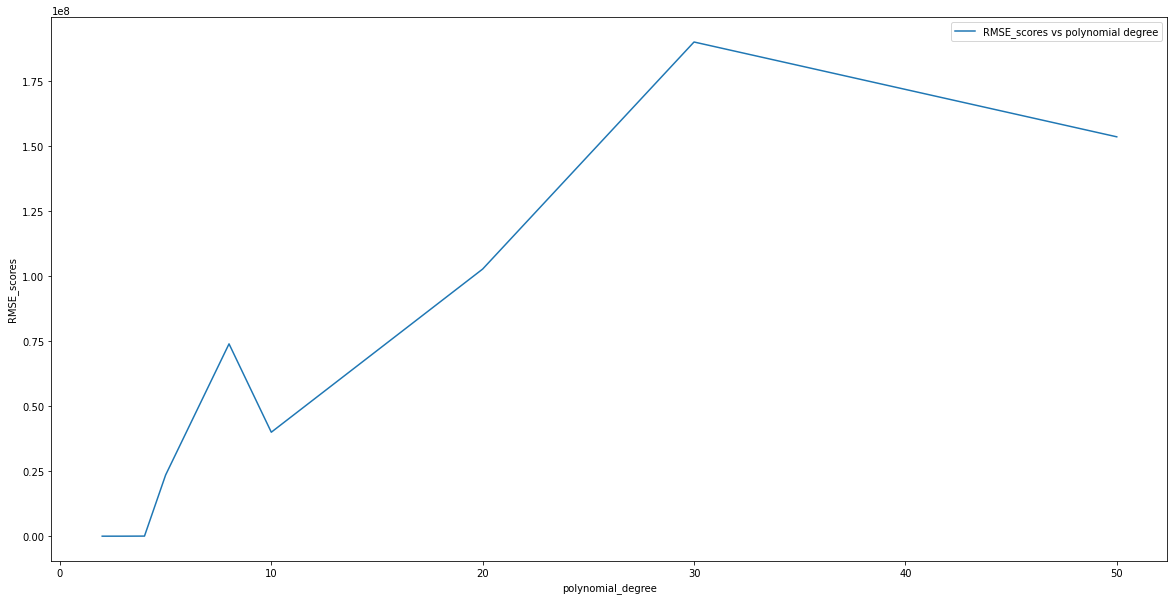

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(polynomial_degrees, RMSE_scores, label="RMSE_scores vs polynomial degree")
plt.xlabel("polynomial_degree")
# plt.xticks(range(1, 11, 1))
plt.ylabel("RMSE_scores")
plt.legend(loc='best')
plt.show()

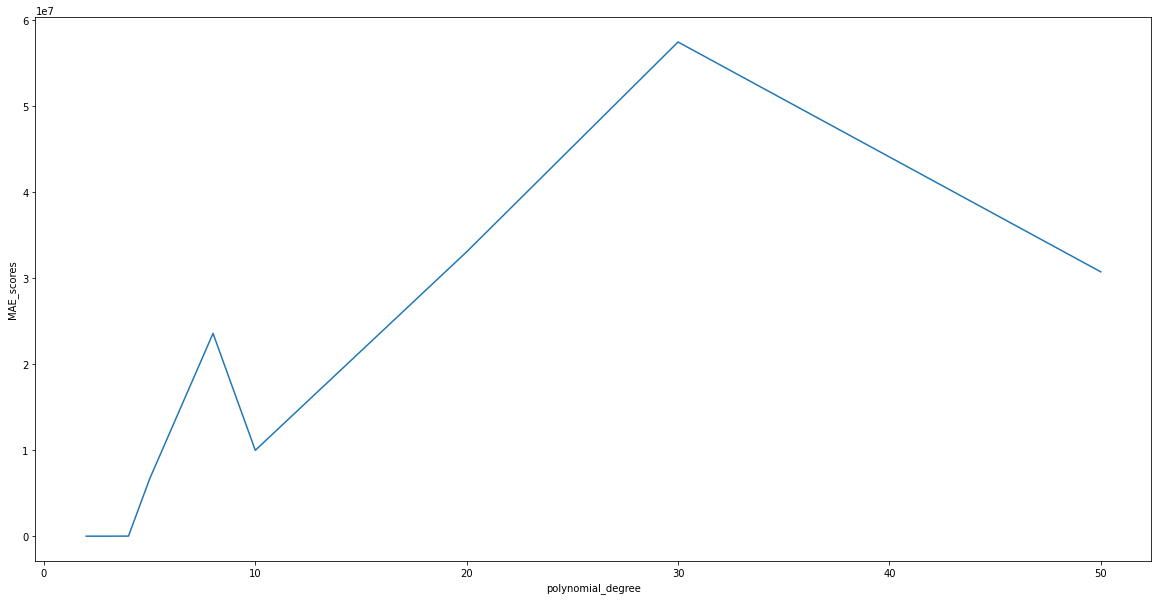

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(polynomial_degrees, MAE_scores, label="MAE_scores vs polynomial_degree")
plt.xlabel("polynomial_degree")
# plt.xticks(range(1, 11, 1))
plt.ylabel("MAE_scores")
# plt.legend(loc='best')
plt.show()

In [ ]:
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=42)
model_linear_for_polynomial.fit(x_train, y_train)
predict_y = model_linear_for_polynomial.predict(x_test)

In [ ]:
print(f'RMSE dla modelu 2-giego stopnia: {mean_squared_error(y_test, predict_y, squared=False)}')
print(f'MAE dla modelu 2-giego stopnia: {mean_absolute_error(y_test, predict_y)}')

RMSE dla modelu 2-giego stopnia: 2705.826268817282
MAE dla modelu 2-giego stopnia: 2016.2520109859552


#Model nieliniowy - drzewo decyzyjne z testowaniem

In [ ]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
for train, test in cv.split(x, y):
  x_train, y_train = x.iloc[train], y.iloc[train]
  x_test, y_test = x.iloc[test], y.iloc[test]

In [ ]:
def train_model_tree(train_x, train_y, test_x, test_y, i, j):
  model_tree = DecisionTreeRegressor(max_depth=i, min_samples_split=j)
  model_tree.fit(train_x, train_y)
  predict_y = model_tree.predict(test_x)
  return mean_squared_error(y_test, predict_y, squared=False), mean_absolute_error(y_test, predict_y)

In [ ]:
tree_depth = [1, 2, 5, 6, 7, 9, 10, 12]

In [ ]:
tree_min_sample_split = [2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
min_RMSE_score, min_MAE_score  = 10000, 10000
RMSE_scores = []
MAE_scores = []
for depth in tree_depth:
  for min_samp_split in tree_min_sample_split:
    RMSE_score, MAE_score = train_model_tree(x_train, y_train, x_test, y_test, depth, min_samp_split)
    RMSE_scores.append(RMSE_score)
    MAE_scores.append(MAE_score)
    if RMSE_score <= min_RMSE_score:
      min_RMSE_score = RMSE_score
      min_RMSE_depth = depth
      min_RMSE_min_samp = min_samp_split
    if MAE_score <= min_MAE_score:
      min_MAE_score = MAE_score
      min_MAE_depth = depth
      min_MAE_min_samp = min_samp_split

In [ ]:
print(f'MIN RMSE dla modelu drzewa decyzyjnego: {min_RMSE_score} przy max_depth = {min_RMSE_depth} i min_sample_split = {min_RMSE_min_samp}')
print(f'MIN MAE dla modelu drzewa decyzyjnego: {min_MAE_score} przy max_depth = {min_MAE_depth} i min_sample_split = {min_MAE_min_samp}')

MIN RMSE dla modelu drzewa decyzyjnego: 3404.0567802940736 przy max_depth = 5 i min_sample_split = 9
MIN MAE dla modelu drzewa decyzyjnego: 2675.2369190397144 przy max_depth = 5 i min_sample_split = 9


Model nieliniowy daje gorsze wyniki od modelu liniowego i wielomianu. W dalszym postępowaniu należy rozpatrywać model wielomianu stopnia drugiego.

Sprawdzenie funkcji kosztu, optymalnego learning rate i ilości iteracji niezbędnych do znalezienia min kosztu dla welomianu stopnia drugiego.

In [ ]:
# Data normalization
m = len(x_poly)
x = x_poly/x_poly.max()

In [ ]:
# Hypothesis function. That will use the X and theta to predict the ‘y_predicted'
def hypothesis(x_poly, theta):
  y_predicted = theta * x_poly
  return np.sum(y_predicted)

In [ ]:
# Cost function definition
def cost(x_poly, y, theta):
  y_predicted = hypothesis(x_poly, theta)
  return sum(np.sqrt((y_predicted - y)**2))/(2*m)

In [ ]:
# Function for gradient descent
def gradientDescent(x_poly, y, theta, alpha, epoch):
  J = []
  k = 0
  while k < epoch:
    y_predicted = hypothesis(x_poly, theta)
    for c in range(x_poly.shape[1]):
      theta[c] = theta[c] - alpha * sum((y_predicted - y) * x_poly[:, c])/m
    j = cost(x_poly, y, theta)
    J.append(j)
    k += 1
  return J, theta

In [ ]:
# theta initialization
theta = np.array([0.0] * x_poly.shape[1])

In [ ]:
learning_rate, epochs = 0.000000000001, 1000

In [ ]:
# Choosing alpha as 0.05 and iterate for 700 epochs
J, theta = gradientDescent(x_poly, y, theta, learning_rate, epochs)

In [ ]:
# Prediction
y_hat = hypothesis(x_poly, theta)

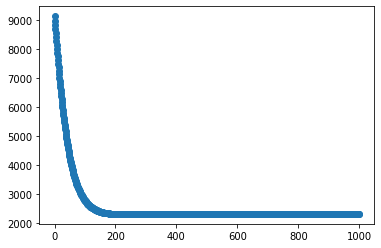

In [ ]:
# Plot the calculated cost in each epoch in gradient descent function
plt.figure()
plt.scatter(x=list(range(0, epochs)), y=J)
plt.show()

Funkcja kosztu osiąga swoje minimum po około 200 iteracjach przy learning rate = 0.000000000001.

In [ ]:
print(f'Wartość funkcji kosztu wyliczoną z modelu dla wielomianu = {cost(x_poly, y, model_linear_for_polynomial.coef_) + (model_linear_for_polynomial.intercept_ * len(model_linear_for_polynomial.coef_))}')
print(f'Wartość funkcji kosztu metodą gradientu prostego po 200 iteracjach = {J[200]}')

Wartość funkcji kosztu wyliczoną z modelu dla wielomianu = 5074732.153024219
Wartość funkcji kosztu metodą gradientu prostego po 200 iteracjach = 2330.3287213263225


In [ ]:
theta

array([ 3.56583457e-07, -3.31476515e-06,  6.76021444e-05,  5.13844662e-05,
       -5.81226213e-07, -3.63091173e-05, -8.00713405e-05, -8.83695213e-05,
       -2.64215020e-06,  7.60407729e-03,  5.97003042e-03, -3.65888838e-05,
        4.65487677e-03, -3.23484170e-05, -4.97435261e-07])

In [ ]:
model_linear_for_polynomial.coef_

array([ 0.00000000e+00,  3.12439029e+03,  1.36920233e+03, -1.85715404e+02,
       -2.53542719e+04, -3.85816871e+02, -1.47651191e+00, -1.70327805e+01,
        8.47399449e+02, -1.07450214e+01,  8.70944100e+00,  1.32832518e+02,
       -4.39345655e+00, -1.88264800e+01,  5.24119373e+03])

In [ ]:
model_linear_for_polynomial.intercept_

-33785.83047152414

Porwónanie wartości predykcyjnych dla modelu wielomianu stopnia drugiego dostrojonego metodą fit i tego znalezionego za pomocą funkcji kosztu.

In [ ]:
#[['Day', 'High Temp (°F)', 'Low Temp (°F)', 'Precipitation']] - przykładowe dane
x_to_predict = [
                [2, 70, 65, 0.1],
                [3, 70, 65, 0.1],
                [3, 80, 75, 0.1],
                [3, 80, 75, 0]
                ]
poly = PolynomialFeatures(degree=2)
x_poly_to_predict = poly.fit_transform(x_to_predict)

In [ ]:
model_linear_for_polynomial.predict(x_poly_to_predict)

array([19180.28914612, 19249.84845779, 21003.76318587, 22311.09705416])

Ocena bias i variance

In [ ]:
# !pip3 install --upgrade mlxtend

In [ ]:
from mlxtend.evaluate import bias_variance_decomp

In [ ]:
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=42)

In [ ]:
y_test.shape

(43,)

In [ ]:
y_test2 = y_test.re

In [ ]:
x_test2.shape

In [ ]:
x = data[['Day', 'High Temp (°F)', 'Low Temp (°F)', 'Precipitation']]
y = data['Total']

In [ ]:
x[:5]

,Day,High Temp (°F),Low Temp (°F),Precipitation
0,5,78.1,66.0,0.01
1,6,55.0,48.9,0.15
2,7,39.9,34.0,0.09
3,1,44.1,33.1,0.47
4,2,42.1,26.1,0.00


In [ ]:
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp.bias_variance_decomp(
    model_linear_for_polynomial, x_train.values, y_train.values, x_test.values, y_test.values, 
    loss='mse',
    num_rounds=1000)
    # random_seed=123)
    # epochs=200, # fit_param
    # verbose=0)
     # fit_param

In [ ]:
print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 12168746.781
Average bias: 11741385.937
Average variance: 427360.844


In [ ]:
model_linear_for_polynomial.coef_ = theta
model_linear_for_polynomial.fit_intercept = False

In [ ]:
model_linear_for_polynomial_cost = LinearRegression(fit_intercept=False)

In [ ]:
model_linear_for_polynomial_cost.coef_ = theta

In [ ]:
model_linear_for_polynomial_cost.predict(x_poly_to_predict)

In [ ]:
hypothesis(x_poly_to_predict[3], theta)

asas

In [ ]:
def train_model(train_x, train_y, val_x, val_y, k):
    model = DecisionTreeRegressor(min_samples_split=k)
    model.fit(train_x, train_y)
    pred_train_y = model.predict(train_x)
    pred_val_y = model.predict(val_x)
    return mean_squared_error(train_y, pred_train_y, squared=False), \
            mean_squared_error(val_y, pred_val_y, squared=False)

In [ ]:

model_tree = DecisionTreeRegressor()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
y_test.shape

In [ ]:

model_tree.fit(x_train, y_train)

In [ ]:
y_predict_tree = model_tree.predict(x_test)

In [ ]:
print(f'RMSE dla modelu liniowego: {mean_squared_error(y_test, y_predict_linear, squared=False)}')
print(f'RMSE dla modelu drzewa: {mean_squared_error(y_test, y_predict_tree, squared=False)}')

In [ ]:
print(f'MAE dla modelu liniowego: {mean_absolute_error(y_test, y_predict_linear)}')
print(f'MAE dla modelu drzewa: {mean_absolute_error(y_test, y_predict_tree)}')

Model liniowy wykazuje mniejszy błąd MAE i RMSE niż drzewo decyzyjne. Próbujemy jeszcze wielomianem.

In [ ]:
model_linear_for_polynomial = LinearRegression()
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

In [ ]:
x_train_poly, x_test_poly, y_train_poly, y_test_poly = train_test_split(x_poly, y, test_size=0.2, random_state=42)

In [ ]:
model_linear_for_polynomial.fit(x_train_poly, y_train_poly)

In [ ]:
y_predict_polynomial = model_linear_for_polynomial.predict(x_test_poly)

In [ ]:
print(f'R2 for polynomial: {r2_score(y_test_poly, y_predict_polynomial)}')
print(f'MAE for polynomial: {mean_absolute_error(y_test_poly, y_predict_polynomial)}')
print(f'RMSE for polynomial: {mean_squared_error(y_test_poly, y_predict_polynomial, squared=False)}')

Model metodą kroswalidacji dla wielomianu

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
#dla wielomianu
cv_poly = KFold(n_splits=5, shuffle=True, random_state=42)
for train, test in cv_poly.split(x_poly, y):
  x_train_poly, y_train_poly = x.iloc[train], y.iloc[train]
  x_test_poly, y_test_poly = x.iloc[test], y.iloc[test]

In [ ]:
model_linear_for_polynomial.fit(x_train_poly, y_train_poly)
y_predict_polynomial = model_linear_for_polynomial.predict(x_test_poly)

In [ ]:
print(f'R2 for polynomial dla modelu metodą kroswalidacji k-krotną: {r2_score(y_test_poly, y_predict_polynomial)}')
print(f'MAE for polynomial dla modelu metodą kroswalidacji k-krotną: {mean_absolute_error(y_test_poly, y_predict_polynomial)}')
print(f'RMSE fr polynomial dla modelu metodą kroswalidacji k-krotną: {mean_squared_error(y_test_poly, y_predict_polynomial, squared=False)}')

Model liniowy ma lepsze R2 niz wielomianowy, ale większe błędy.
Oznacza to, że model liniowy ma większą wariancję, ale lepszy bias - bardziej pokrywa się z danymi.

Zbiór walidacyjny

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data[['Date', 'High Temp (°F)', 'Low Temp (°F)', 'Precipitation']]
y = data['Total']

In [ ]:
X_train, X_test, y_train, y_test =\
  train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val =\
  train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [ ]:
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go 
from plotly.offline import iplot

X = data[['Date','Low Temp (°F)', 'High Temp (°F)', 'Precipitation']]

fig = make_subplots(rows=2, cols=2)


fig.add_trace(go.Scatter(x=X['Date'], y=y, mode='markers',
                    name='Total / Date',
                    marker=dict(color='rgba(16,112,2,0.8)'), text=X_test['Date']),
                    row=1, col=1)

fig.add_trace(go.Scatter(x=X['Low Temp (°F)'], y=y, mode='markers',
                    name='Total / Low Temp',
                    marker=dict(color='rgba(255,0,0,0.8)'), text=X_test['Low Temp (°F)']),
                    row=2, col=1)

fig.add_trace(go.Scatter(x=X['High Temp (°F)'], y=y, mode='markers',
                    name='Total / High Temp',
                    marker=dict(color='rgba(0,0,255,0.8)'), text=X_test['High Temp (°F)']),
                    row=1, col=2)

fig.add_trace(go.Scatter(x=X['Precipitation'], y=y, mode='markers',
                    name='Precipitation',
                    marker=dict(color='rgba(255,0,255,0.8)'), text=X_test['Precipitation']),
                    row=2, col=2)



one_more_trace=dict(type='line', x=x_test['Date'],y=y_predict_linear, mode='lines', line=dict(color='red'))
fig.append_trace(one_more_trace, 1, 1)


one_more_trace=dict(type='line', x=x_test['Low Temp (°F)'],y=y_predict_linear, mode='lines', line=dict(color='red'))
fig.append_trace(one_more_trace, 1, 2)


one_more_trace=dict(type='line', x=x_test['High Temp (°F)'],y=y_predict_linear, mode='lines', line=dict(color='red'))
fig.append_trace(one_more_trace, 2, 1)


one_more_trace=dict(type='line', x=x_test['Precipitation'],y=y_predict_linear, mode='lines', line=dict(color='red'))
fig.append_trace(one_more_trace, 2, 2)


layout = dict(title=' ',xaxis=dict(title='Total'))

fig.update_layout(layout)

iplot(fig)

In [ ]:
plt.bar(x_test['Date'], y_predict_linear, color='blue', linewidth=3)

In [ ]:
plt.bar(x_test['High Temp (°F)'], y_predict_linear, color='blue', linewidth=3)
plt.bar(x_test['Low Temp (°F)'], y_predict_linear, color='red', linewidth=3)

In [ ]:
plt.bar(x_test['Precipitation'], y_predict_linear, color='blue', linewidth=3)